# TRABAJO PRACTICO DATOS.
## En el siguiente trabajo se analizara un dataset con datos socio-economicos de varias provincias argentinas.Analizaremos diez indicadores económicos y sociales recogidos para cada provincia.
## Identificando las diferencias entre las provincias y los valores atipicos que cada una pueda tener en diferentes variables.
## Se plantearan una hipotesis, que sera analizada, mediante los datos observados y un analisis de correlacion.
## Finalmente se realizara un modelo de correlacion lineal multiple para poder aventurar como se comportarian los datos al adicionar de mas provincias.


## En el siguiente trabajo, se analizará un dataset con datos socioeconómicos de varias provincias argentinas. Se examinarán diez indicadores económicos y sociales recopilados para cada provincia.
## Identificaremos las diferencias entre las provincias y los valores atípicos que cada una pueda tener en diferentes variables.
## Se planteará una hipótesis, que será analizada mediante los datos observados y un análisis de correlación.
## Finalmente, se realizará un modelo de correlación lineal múltiple para aventurar cómo se comportarían los datos al adicionar más provincias.





### Antes de comenzar, vale aclarar que, al analizar los datos, nos encontraremos con varios outliers, los cuales decidimos no estandarizar, ya que representan la heterogeneidad de las provincias argentinas y consideramos que esa misma heterogeneidad debe ser tenida en cuenta para realizar cualquier análisis.

In [11]:
!pip install scikit-learn

In [12]:
import pandas as dp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
df= dp.read_csv("../fsoc-data-test/datasets/argentina.csv")

+ El archivo no incluye Ciudad Autonoma de Buenos Aires y Tierra del Fuego.

In [14]:
df

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440
8,Jujuy,6.484938e+06,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415


In [15]:
df.dtypes

province                   object
gdp                       float64
illiteracy                float64
poverty                   float64
deficient_infra           float64
school_dropout            float64
no_healthcare             float64
birth_mortal              float64
pop                         int64
movie_theatres_per_cap    float64
doctors_per_cap           float64
dtype: object

In [16]:
df.describe()

,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
count,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000
mean,3.055703e+07,3.225541,9.925625,12.677304,1.724866,50.768836,4.986364,1.686352e+06,0.000007,0.004894
std,6.183100e+07,1.851496,3.779530,7.216860,1.152438,9.181037,3.498339,3.219828e+06,0.000004,0.001522
min,3.807057e+06,0.791485,3.398774,3.839852,0.204093,29.232100,0.800000,2.739640e+05,0.000002,0.002821
25%,8.041587e+06,1.989810,7.472754,7.569677,0.812617,45.548300,3.025000,5.143715e+05,0.000004,0.004061
50%,1.096416e+07,2.743675,9.142440,10.865881,1.437767,49.370500,4.000000,7.775305e+05,0.000006,0.004757
75%,1.999452e+07,3.686190,12.500143,16.100647,2.514496,56.915800,5.875000,1.230606e+06,0.000009,0.005334
max,2.926899e+08,7.517580,17.035583,31.479527,3.864265,65.812600,16.200000,1.562508e+07,0.000019,0.010175


In [17]:
print ("archivos nulos en nuestro data set"), df.isna().sum()

archivos nulos en nuestro data set


(None,
 province                  0
 gdp                       0
 illiteracy                0
 poverty                   0
 deficient_infra           0
 school_dropout            0
 no_healthcare             0
 birth_mortal              0
 pop                       0
 movie_theatres_per_cap    0
 doctors_per_cap           0
 dtype: int64)

+ El DataSet no posee valores nulos por lo que no hay que realizar ningun tipo de correcion en los valores

In [18]:
n_filas, n_columnas = df.shape
print(f'El archivo CSV tiene {n_filas} filas y {n_columnas} columnas.')

El archivo CSV tiene 22 filas y 11 columnas.


# Analisis de Varaibles. 
### Visualización, principales estadísticos, detección de outliers y análisis de los mismos.

## Variable 1 : (GDP) - Producto Bruto Interno

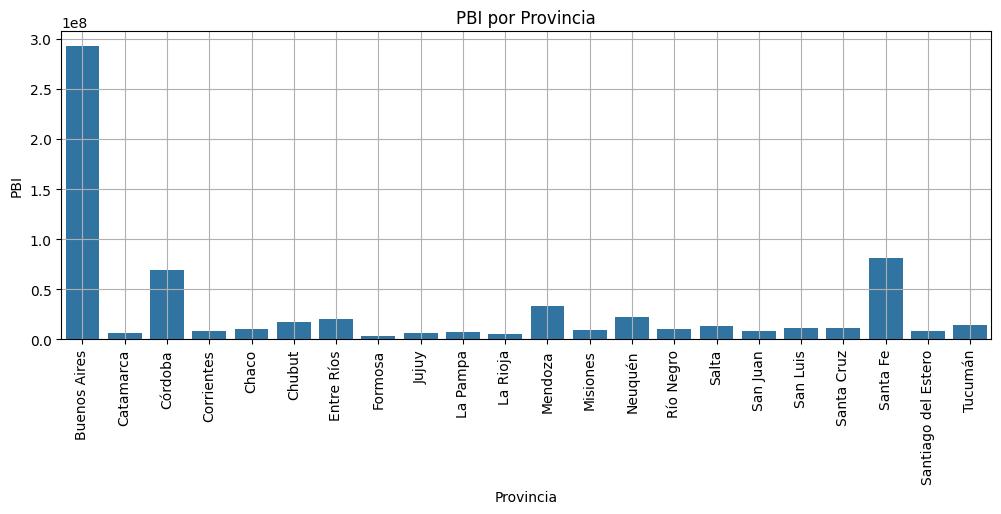

In [19]:
fig = plt.figure(figsize = (12,4))
sns.barplot(data=df,x="province", y="gdp")
plt.xticks(rotation=90) 
plt.grid()
plt.xlabel("Provincia")
plt.ylabel("PBI")
plt.title("PBI por Provincia")
plt.show()


+ Buenos Aires alcanza el 2.8 dentro del grafico lo que indica :28.000.000. El diagrama a utilizar es un diagrama de columnas ya que nos encontramos con un tipo de dato entero el cual nos permite realizar este tipo de analisis ademas, el grafico de barras permite analizar y visualizar con mayor facilidad la distancia entre los datos

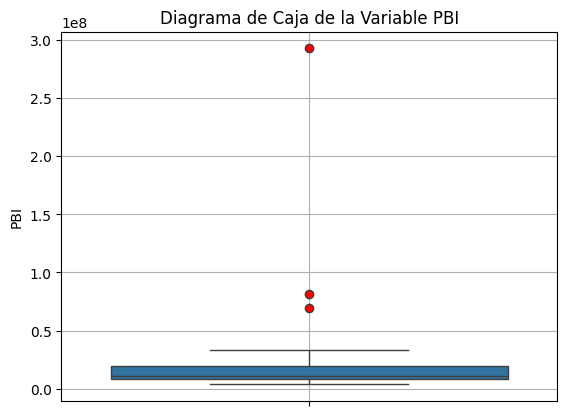

In [20]:
sns.boxplot(data=df, y="gdp",flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.title("Diagrama de Caja de la Variable PBI")
plt.ylabel("PBI")
plt.grid()
plt.show()

In [21]:
print("la media del conjunto (PBI)",df ["gdp"].mean())
print("la mediana del conjunto (PBI)",df ["gdp"].median())
# Escribir normalizando los datos abajo diciendo : pbi media : tatata. mediana pbi: tatata

la media del conjunto (PBI) 30557027.883686412
la mediana del conjunto (PBI) 10964161.2315008


+ No se analiza la moda, ya que ningun valor se repite

In [22]:
Q1= df["gdp"].quantile(0.25)
Q3= df["gdp"].quantile(0.75)
iqr= Q3-Q1
umbral_superior = Q3 + 1.50*iqr
umbral_inferior = max(0, Q1 - 1.5 * iqr)
print("Un valor de PBI por debajo de:",umbral_inferior,"es un outlier") 
print("Un valor de PBI por arriba de:",umbral_superior,"es un outlier")

Un valor de PBI por debajo de: 0 es un outlier
Un valor de PBI por arriba de: 37923920.61637083 es un outlier


In [23]:
outliers= df[(df["gdp"] < umbral_inferior) | (df["gdp"] > umbral_superior)]
print ("existen en esta variable",len(outliers), "Outliers")

existen en esta variable 3 Outliers


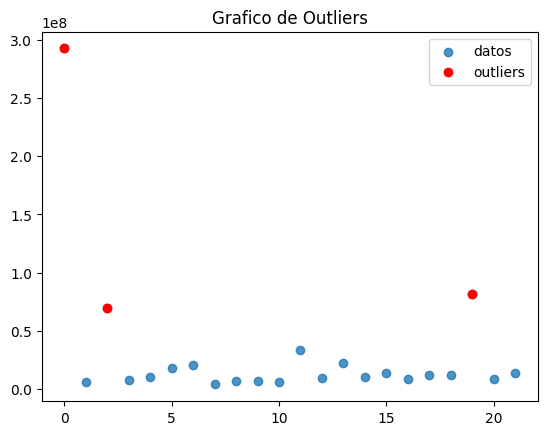

In [24]:
plt.scatter(df.index,df["gdp"], label="datos", alpha=0.8)
plt.scatter(outliers.index,outliers["gdp"], color="red", label="outliers")
plt.title("Grafico de Outliers")
plt.legend()
plt.show()

# Variable 2: (illiteracy) - Tasa de analfabetismo

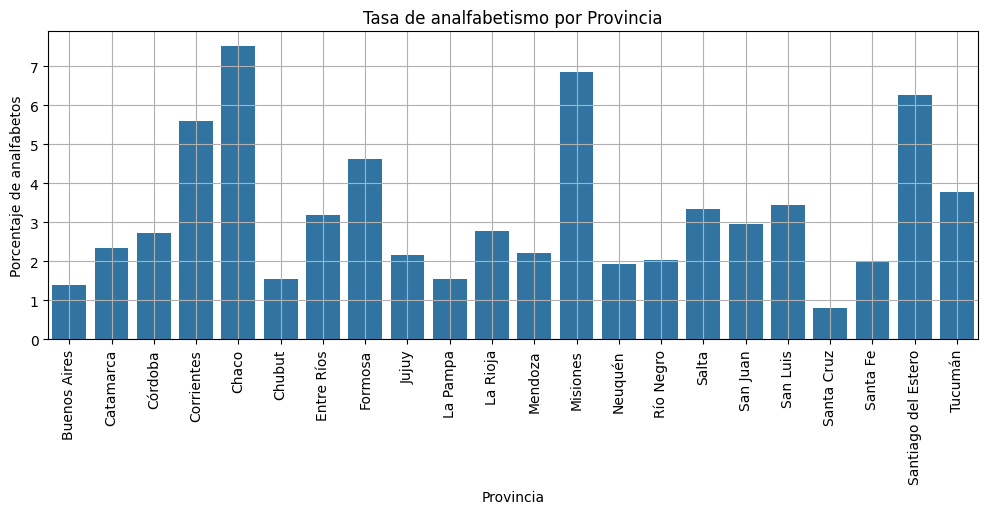

In [25]:
fig = plt.figure(figsize = (12,4))
sns.barplot(data=df,x="province", y="illiteracy")
plt.xticks(rotation=90) 
plt.grid()
plt.xlabel("Provincia")
plt.ylabel("Porcentaje de analfabetos")
plt.title("Tasa de analfabetismo por Provincia")
plt.show()

+Nuevamente, al econtrarnos con un tipo de datos que es entero, se nos da la posibilidad de utilziar el diagrama de barras como opcion para poder graficar esta variable, nuevamente, el diagrama de barras nos permite vicibilizar con mayor facilidad la disntancia que existe entre estos

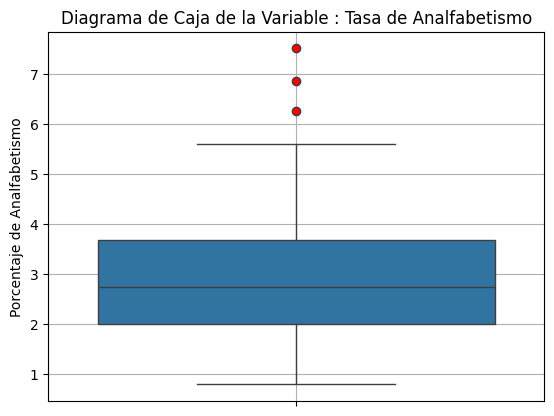

In [26]:
sns.boxplot(data=df, y="illiteracy",flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.title("Diagrama de Caja de la Variable : Tasa de Analfabetismo")
plt.ylabel("Porcentaje de Analfabetismo")
plt.grid()
plt.show()

In [27]:
print("La media del conjunto (Tasa de Analfabetismo)",df ["illiteracy"].mean())
print("La mediana del conjunto (Tasa de Analfabetismo)",df ["illiteracy"].median())

La media del conjunto (Tasa de Analfabetismo) 3.2255411363636366
La mediana del conjunto (Tasa de Analfabetismo) 2.743675


In [28]:
Q1= df["illiteracy"].quantile(0.25)
Q3= df["illiteracy"].quantile(0.75)
iqr= Q3-Q1
umbral_superior = Q3 + 1.50*iqr
umbral_inferior = max(0,Q1 - 1.5 * iqr)
print("Un valor de % de analfabetismo por debajo de:",umbral_inferior,"es un outlier")
print("Un valor de % de analfabetismo por arriba de:",umbral_superior,"es un outlier")

Un valor de % de analfabetismo por debajo de: 0 es un outlier
Un valor de % de analfabetismo por arriba de: 6.230760000000001 es un outlier


In [29]:
outliers= df[(df["illiteracy"] < umbral_inferior) | (df["illiteracy"] > umbral_superior)]
print ("cantidad de Outliers",len(outliers))

cantidad de Outliers 3


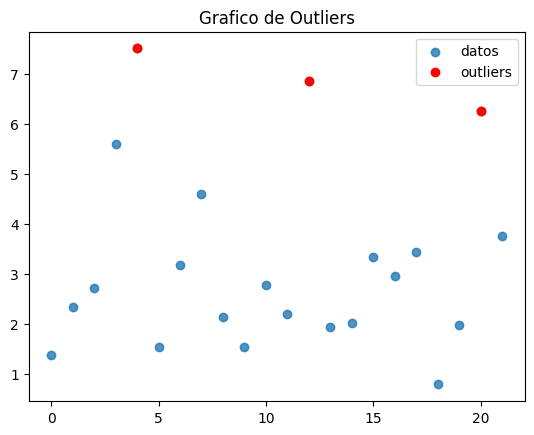

In [30]:
plt.scatter(df.index,df["illiteracy"], label="datos", alpha=0.8)
plt.scatter(outliers.index,outliers["illiteracy"], color="red", label="outliers")
plt.title("Grafico de Outliers")
plt.legend()
plt.show()

+ Este grafico ayuda a comprender la dispercion entre los datos mirando los outliers, viendo como hay valores que estan cerca pero no llegan a ser outliers, esto nos permtie ver como pese a estar por encima del 15% la diferencia es casi minima con respecto al valor mas cercano a estos, siendo este la Provincida de Corrientes

# Variable 3: (Poverty) - Tasa de Pobreza

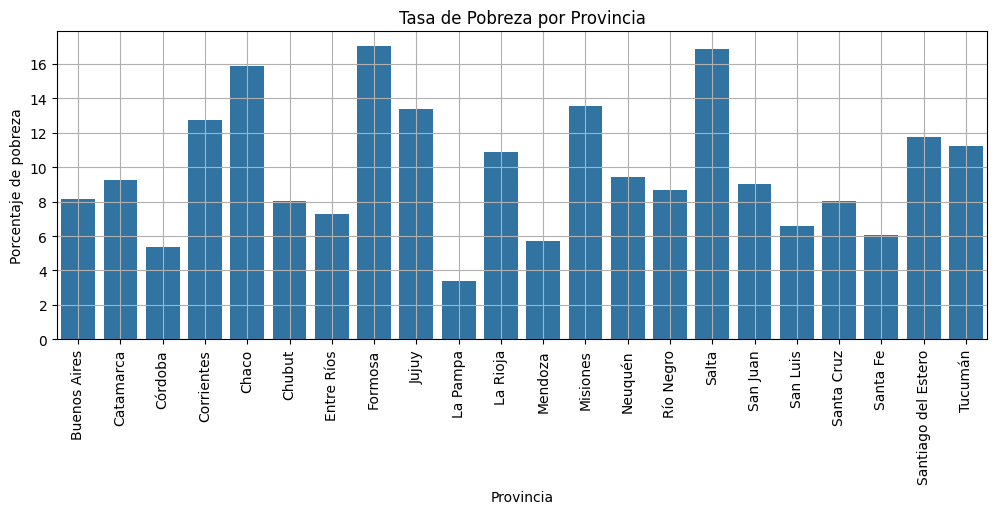

In [31]:
fig = plt.figure(figsize = (12,4))
sns.barplot(data=df,x="province", y="poverty")
plt.xticks(rotation=90) 
plt.grid()
plt.xlabel("Provincia")
plt.ylabel("Porcentaje de pobreza")
plt.title("Tasa de Pobreza por Provincia")
plt.show()

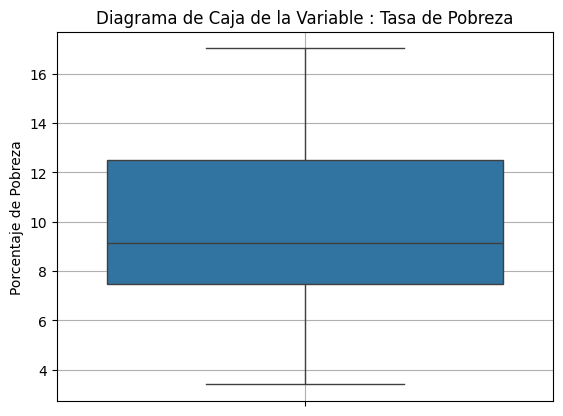

In [32]:
sns.boxplot(data=df, y="poverty",flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.title("Diagrama de Caja de la Variable : Tasa de Pobreza")
plt.ylabel("Porcentaje de Pobreza")
plt.grid()
plt.show()

In [33]:
print("La media del conjunto (Tasa de Analfabetismo)",df ["illiteracy"].mean())
print("La mediana del conjunto (Tasa de Analfabetismo)",df ["illiteracy"].median())

La media del conjunto (Tasa de Analfabetismo) 3.2255411363636366
La mediana del conjunto (Tasa de Analfabetismo) 2.743675


In [34]:
Q1= df["poverty"].quantile(0.25)
Q3= df["poverty"].quantile(0.75)
iqr= Q3-Q1
umbral_superior = Q3 + 1.50*iqr
umbral_inferior = max(0,Q1 - 1.5 * iqr)
print("Un valor de % de analfabetismo por debajo de:",umbral_inferior,"es un outlier")
print("Un valor de % de analfabetismo por arriba de:",umbral_superior,"es un outlier")

Un valor de % de analfabetismo por debajo de: 0 es un outlier
Un valor de % de analfabetismo por arriba de: 20.041226897408432 es un outlier


In [35]:
outliers= df[(df["poverty"] < umbral_inferior) | (df["poverty"] > umbral_superior)]
print ("cantidad de Outliers",len(outliers))

cantidad de Outliers 0


+ Nuevameante, en esta variable nos encontramos con que ningun dato supera los limites de 15% superiores al Q3 o inferiores al Q1 por lo que nos encontramos con todos valores que se enceuntran dentro del interquiartil, convirtiendose asi en un dato el cual se encuentra ocilando la media

# Variable 4: (deficient_infra) - Infraestructura deficiente

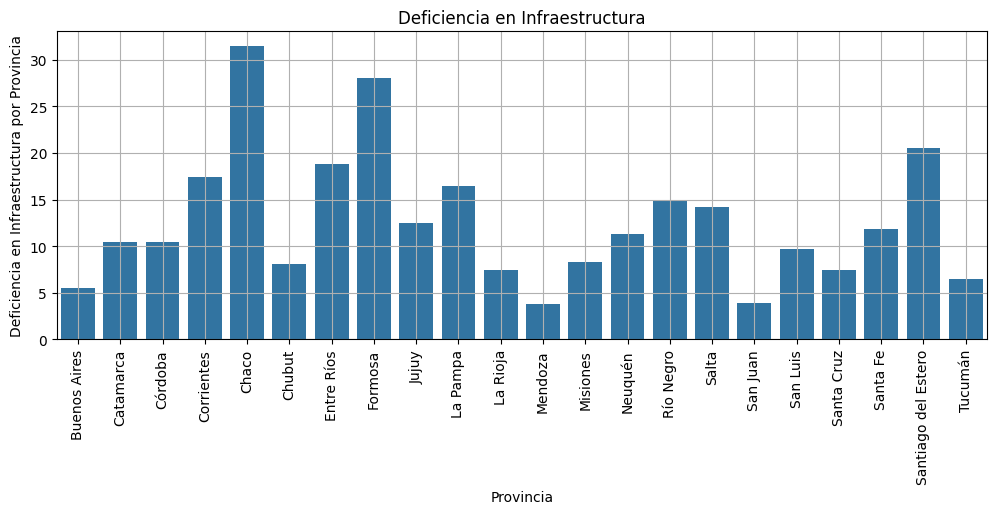

In [36]:
fig = plt.figure(figsize = (12,4))
sns.barplot(data=df,x="province", y="deficient_infra")
plt.grid()
plt.xticks(rotation=90) 
plt.xlabel("Provincia")
plt.ylabel("Deficiencia en Infraestructura por Provincia")
plt.title("Deficiencia en Infraestructura")
plt.show()


+ Este grafico nos ayuda a analizar cuanta deficiencia existe en las infraestructuras de las provincias, los valores van de 0 a 100, siendo 0 muy eficiente y 100, sinedo completamente ineficinete. El grafico a utilizar es un grafico de Barras debido a que trabajamos con una variable entera

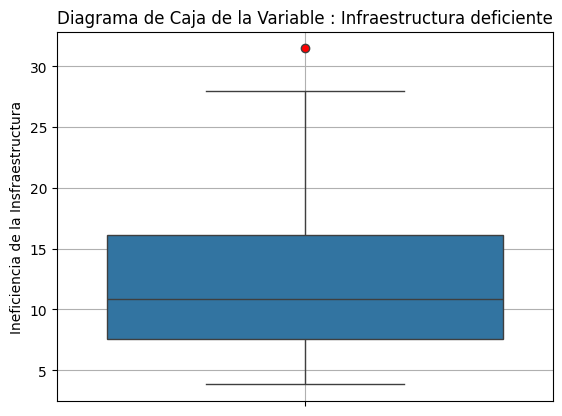

In [37]:
sns.boxplot(data=df, y="deficient_infra",flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.title("Diagrama de Caja de la Variable : Infraestructura deficiente")
plt.ylabel("Ineficiencia de la Insfraestructura")
plt.grid()
plt.show()

In [38]:
print("La media del conjunto (Infraestructura deficiente) es ",df ["deficient_infra"].mean())
print("La mediana del conjunto (Infraestructura deficiente) es",df ["deficient_infra"].median())

La media del conjunto (Infraestructura deficiente) es  12.677304073639316
La mediana del conjunto (Infraestructura deficiente) es 10.865881187511196


In [39]:
Q1= df["deficient_infra"].quantile(0.25)
Q3= df["deficient_infra"].quantile(0.75)
iqr= Q3-Q1
umbral_superior = Q3 + 1.50*iqr
umbral_inferior = max(0,Q1 - 1.5 * iqr)
print("Un valor de infra. defic. por debajo de:",umbral_inferior,"es un outlier")
print("Un valor de infra. defic. por arriba de:",umbral_superior,"es un outlier")

Un valor de infra. defic. por debajo de: 0 es un outlier
Un valor de infra. defic. por arriba de: 28.897101243384355 es un outlier


In [40]:
outliers= df[(df["deficient_infra"] < umbral_inferior) | (df["deficient_infra"] > umbral_superior)]
print ("cantidad de Outliers",len(outliers))

#En  este caso, nos encontramos con solo un outlier

cantidad de Outliers 1


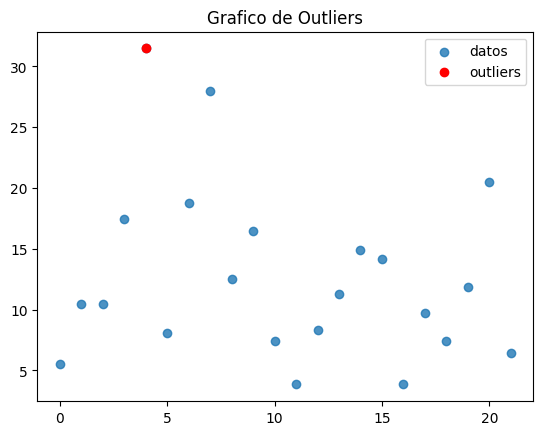

In [41]:
plt.scatter(df.index,df["deficient_infra"], label="datos", alpha=0.8)
plt.scatter(outliers.index,outliers["deficient_infra"], color="red", label="outliers")
plt.title("Grafico de Outliers")
plt.legend()
plt.show()

+ En esta caso, el unico Outlier no esta tan alejado del valor mas elevado dentro del interquartil, siendo este formosa, esta difrencia no es tan facil de apreciar en el grafico de Caja ni en el de barras, por lo que consideramos optimo sumar nuevamente el grafico de dispercion

# Variable 5 : (school_dropout) "Tasa de Abandono Escolar"

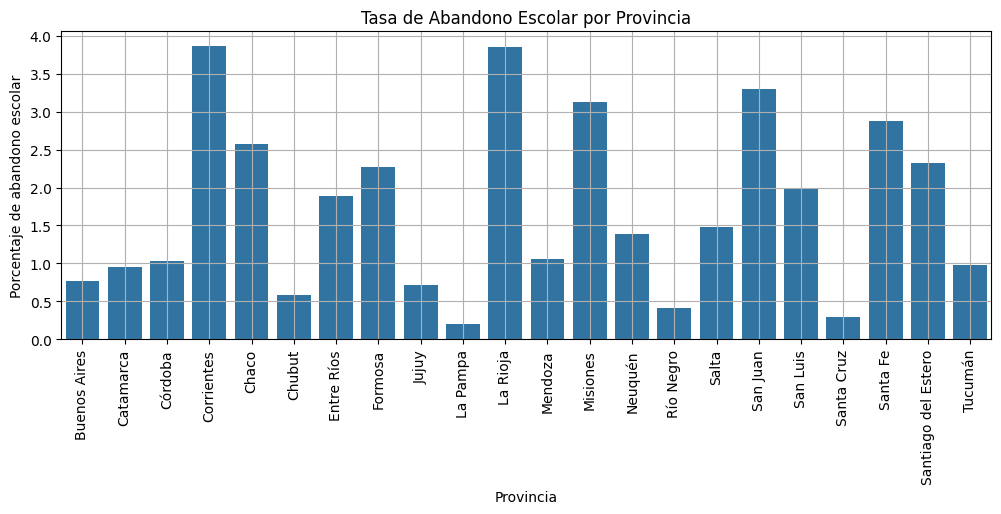

In [42]:
fig = plt.figure(figsize = (12,4))
sns.barplot(data=df,x="province", y="school_dropout")
plt.xticks(rotation=90) 
plt.grid()
plt.xlabel("Provincia")
plt.ylabel("Porcentaje de abandono escolar")
plt.title("Tasa de Abandono Escolar por Provincia")
plt.show()

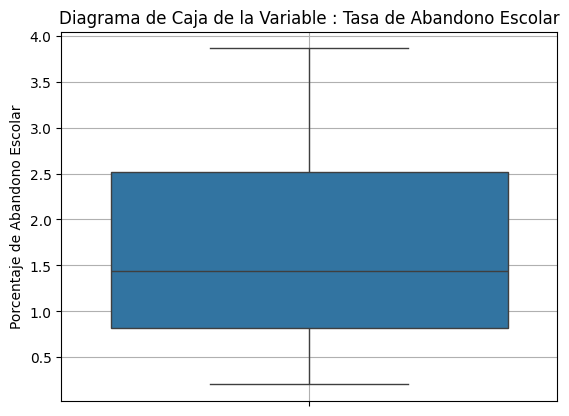

In [43]:
sns.boxplot(data=df, y="school_dropout",flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.title("Diagrama de Caja de la Variable : Tasa de Abandono Escolar")
plt.ylabel("Porcentaje de Abandono Escolar")
plt.grid()
plt.show()

In [44]:
print("La media del conjunto (Tasa de Abandono Escolar) es",df ["school_dropout"].mean())
print("La mediana del conjunto (Tasa de Abandono Escolar)es",df ["school_dropout"].median())

La media del conjunto (Tasa de Abandono Escolar) es 1.7248660248319991
La mediana del conjunto (Tasa de Abandono Escolar)es 1.4377668863334208


In [45]:
Q1= df["school_dropout"].quantile(0.25)
Q3= df["school_dropout"].quantile(0.75)
iqr= Q3-Q1
umbral_superior = Q3 + 1.50*iqr
umbral_inferior = max(0,Q1 - 1.5 * iqr)
print("Un valor de Porcentaje de Abandono Escolar por debajo de:",umbral_inferior,"es un outlier")
print("Un valor de Porcentaje de Abandono Escolar por arriba de:",umbral_superior,"es un outlier")

Un valor de Porcentaje de Abandono Escolar por debajo de: 0 es un outlier
Un valor de Porcentaje de Abandono Escolar por arriba de: 5.067314782442207 es un outlier


In [46]:
outliers= df[(df["school_dropout"] < umbral_inferior) | (df["school_dropout"] > umbral_superior)]
print ("cantidad de Outliers",len(outliers))

cantidad de Outliers 0


+ en esta varialbe, no nos encontramos ocn outliers como bien se puede apreciar en el diagrama de caja, esto es importante de analizar ya que existen valores elevados como lo son los de la Rioja y Corrientes los cuales poseen mucha diferencia con valores como los de La Pampa o Santa Cruz, apesar de esto, niguno llega a ser un Outlier

# Variable 6 : (no_healthcare) - Tasa de Cobertura de Salud (por parte de la seguridad social: obra social y plan médico)

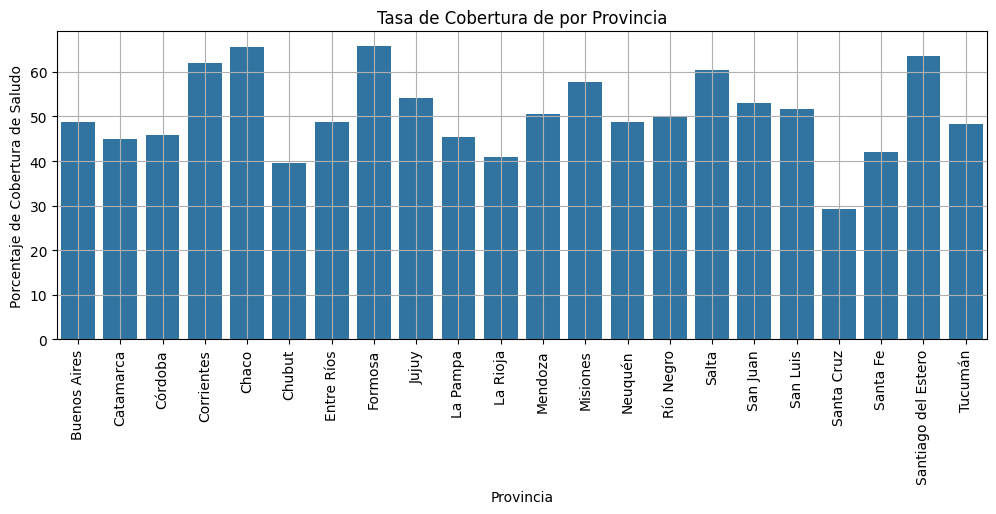

In [47]:
fig = plt.figure(figsize = (12,4))
sns.barplot(data=df,x="province", y="no_healthcare")
plt.xticks(rotation=90) 
plt.grid()
plt.xlabel("Provincia")
plt.ylabel("Porcentaje de Cobertura de Saludo")
plt.title("Tasa de Cobertura de por Provincia")
plt.show()

+ al igual que con las variables anteriores, los valores de tipo entero prefiermos visualizarlos utlizando el grafico de Barras para analizar con mayor detalle y poder comparar entre si

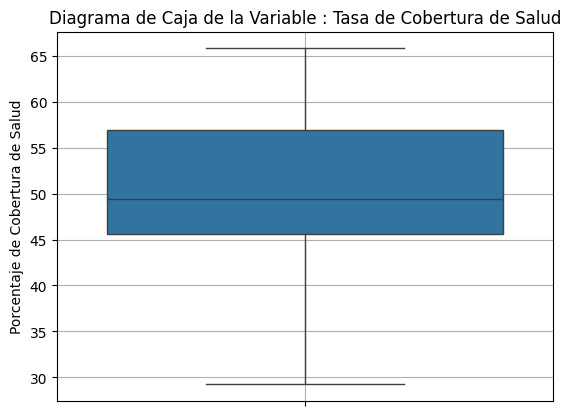

In [48]:
sns.boxplot(data=df, y="no_healthcare",flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.title("Diagrama de Caja de la Variable : Tasa de Cobertura de Salud")
plt.ylabel("Porcentaje de Cobertura de Salud")
plt.grid()
plt.show()

In [49]:
print("La media del conjunto (Tasa de Cobertura de Salud) es",df ["no_healthcare"].mean())
print("La mediana del conjunto (Tasa de Cobertura de Salud)es",df ["no_healthcare"].median())

La media del conjunto (Tasa de Cobertura de Salud) es 50.76883636363637
La mediana del conjunto (Tasa de Cobertura de Salud)es 49.3705


In [50]:
Q1= df["no_healthcare"].quantile(0.25)
Q3= df["no_healthcare"].quantile(0.75)
iqr= Q3-Q1
umbral_superior = Q3 + 1.50*iqr
umbral_inferior = max(0,Q1 - 1.5 * iqr)
print("Un valor de Porcentaje de Cobertura de Salud por debajo de:",umbral_inferior,"es un outlier")
print("Un valor de Porcentaje de Cobertura de Salud por arriba de:",umbral_superior,"es un outlier")

Un valor de Porcentaje de Cobertura de Salud por debajo de: 28.497049999999998 es un outlier
Un valor de Porcentaje de Cobertura de Salud por arriba de: 73.96705 es un outlier


In [51]:
outliers= df[(df["no_healthcare"] < umbral_inferior) | (df["no_healthcare"] > umbral_superior)]
print ("cantidad de Outliers",len(outliers))


cantidad de Outliers 0



+ al igual que con variables anteriores, ya es visible en el grafico de caja la no existencia de ningun outlier, pero resulta pertinente de igual manera dejarlo asemtuado en un "print" para que se pueda ver de mejor manera

# Variable 7 : (birth_mortal) - Tasa de Mortalidad Infantil

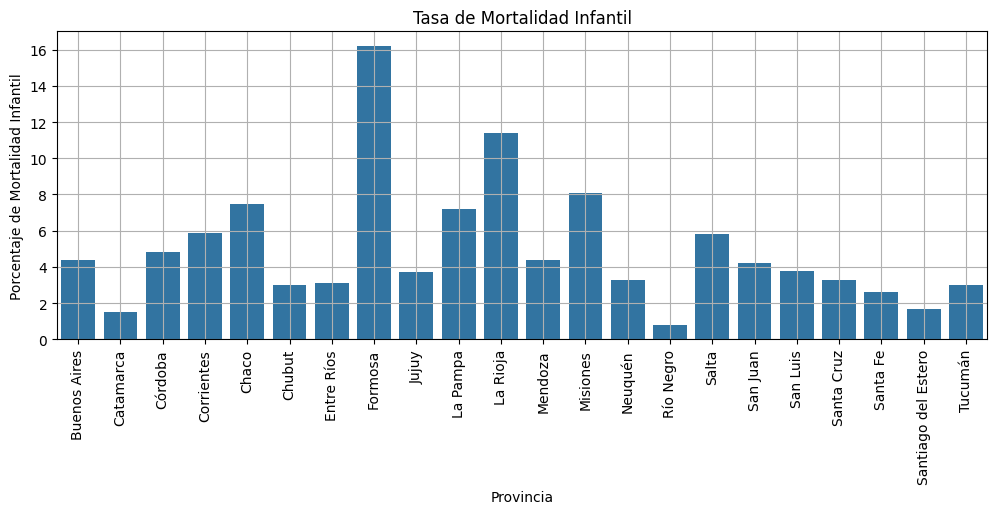

In [52]:
fig = plt.figure(figsize = (12,4))
sns.barplot(data=df,x="province", y="birth_mortal")
plt.xticks(rotation=90) 
plt.grid()
plt.xlabel("Provincia")
plt.ylabel("Porcentaje de Mortalidad Infantil")
plt.title("Tasa de Mortalidad Infantil")
plt.show()

+ nuevamente, nos volvemos a encontrar con una varialbe de tipo entero por lo que prefiermos visualizarlos utlizando el grafico de Barras

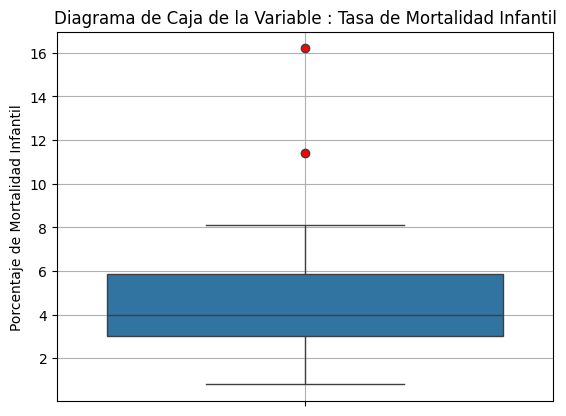

In [53]:
sns.boxplot(data=df, y="birth_mortal",flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.title("Diagrama de Caja de la Variable : Tasa de Mortalidad Infantil")
plt.ylabel("Porcentaje de Mortalidad Infantil")
plt.grid()
plt.show()

In [54]:
print("La media del conjunto (Tasa de Mortalidad Infantil) es",df ["birth_mortal"].mean())
print("La mediana del conjunto (Tasa de Mortalidad Infaltil) es",df ["birth_mortal"].median())

La media del conjunto (Tasa de Mortalidad Infantil) es 4.986363636363635
La mediana del conjunto (Tasa de Mortalidad Infaltil) es 4.0


In [55]:
Q1= df["birth_mortal"].quantile(0.25)
Q3= df["birth_mortal"].quantile(0.75)
iqr= Q3-Q1
umbral_superior = Q3 + 1.50*iqr
umbral_inferior = max(0,Q1 - 1.5 * iqr)
print("Un valor de Porcentaje de Mortalidad Infantil por debajo de:",umbral_inferior,"es un outlier")
print("Un valor de Porcentaje de Mortalidad Infantil por arriba de:",umbral_superior,"es un outlier")

Un valor de Porcentaje de Mortalidad Infantil por debajo de: 0 es un outlier
Un valor de Porcentaje de Mortalidad Infantil por arriba de: 10.15 es un outlier


In [56]:
outliers= df[(df["birth_mortal"] < umbral_inferior) | (df["birth_mortal"] > umbral_superior)]
print ("cantidad de Outliers",len(outliers))


cantidad de Outliers 2


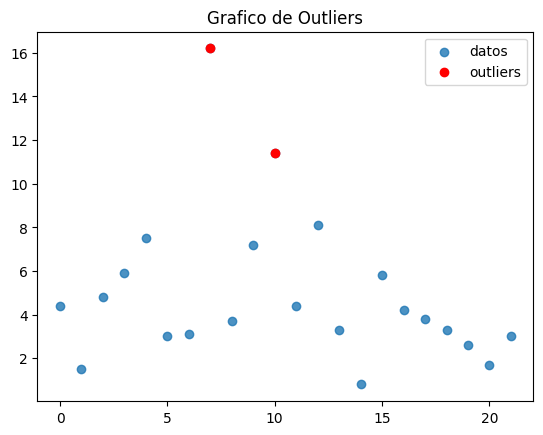

In [57]:
plt.scatter(df.index,df["birth_mortal"], label="datos", alpha=0.8)
plt.scatter(outliers.index,outliers["birth_mortal"], color="red", label="outliers")
plt.title("Grafico de Outliers")
plt.legend()
plt.show()

+ En esta caso, los unicos dos Outliers se enceuntran por encima y con gran diferencia, este grafico permite ver con mayor presicion la disntacia que existe entre los outliers y los resultados que estan muy por debajo sin llegar a ser outliers como lo son Rio Negro o Catamarca

# Variable 8: pop (Población)

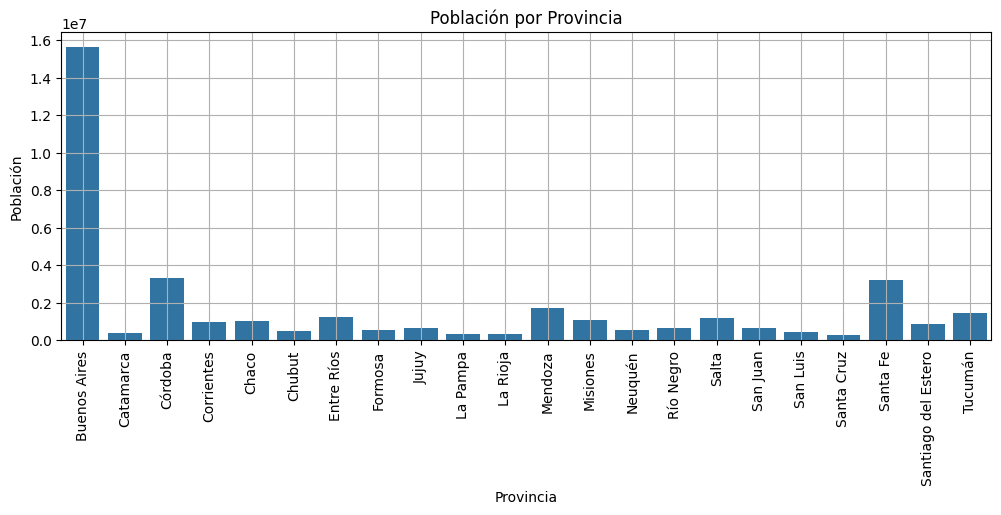

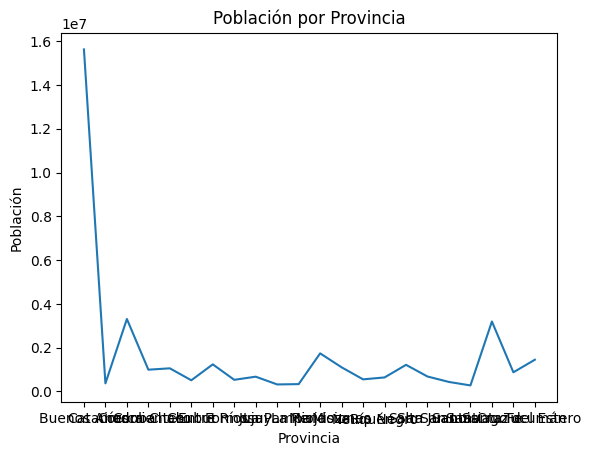

In [58]:
#diagrama de barras
fig = plt.figure(figsize = (12,4))
sns.barplot(data=df,x="province", y="pop")
plt.xticks(rotation=90) 
plt.grid()
plt.xlabel("Provincia")
plt.ylabel("Población")
plt.title("Población por Provincia")
plt.show()
#diagrama lineal
sns.lineplot(data=df,x="province", y="pop")
plt.xlabel("Provincia")
plt.ylabel("Población")
plt.title("Población por Provincia")
plt.show()

+ En este caso, nos econtramos con una variable del tipo que puede ser vist de una manera lineal por ser continua, podemos utilizar no solo el grafico de barras, sino tambien el grafico lineal para pareciar de mejor manera su tendencia

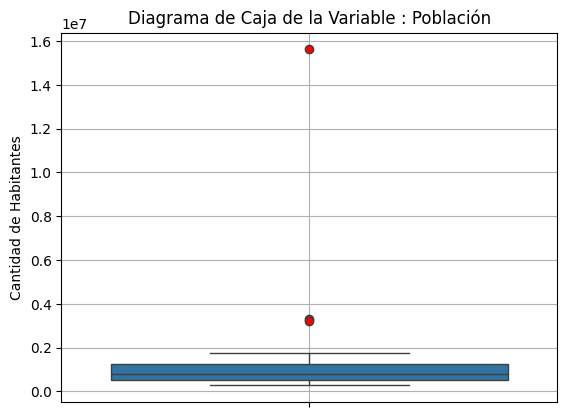

In [59]:
sns.boxplot(data=df, y="pop",flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.title("Diagrama de Caja de la Variable : Población")
plt.ylabel("Cantidad de Habitantes")
plt.grid()
plt.show()

In [60]:
print("La media del conjunto (Población) es",df ["pop"].mean())
print("La mediana del conjunto (Población) es",df ["pop"].median())

La media del conjunto (Población) es 1686351.8181818181
La mediana del conjunto (Población) es 777530.5


In [61]:
Q1= df["pop"].quantile(0.25)
Q3= df["pop"].quantile(0.75)
iqr= Q3-Q1
umbral_superior = Q3 + 1.50*iqr
umbral_inferior = max(0,Q1 - 1.5 * iqr)
print("Un valor de Población por debajo de:",umbral_inferior,"es un outlier")
print("Un valor de Población por arriba de:",umbral_superior,"es un outlier")

Un valor de Población por debajo de: 0 es un outlier
Un valor de Población por arriba de: 2304957.125 es un outlier


In [62]:
outliers= df[(df["pop"] < umbral_inferior) | (df["pop"] > umbral_superior)]
print ("cantidad de Outliers",len(outliers))

cantidad de Outliers 3


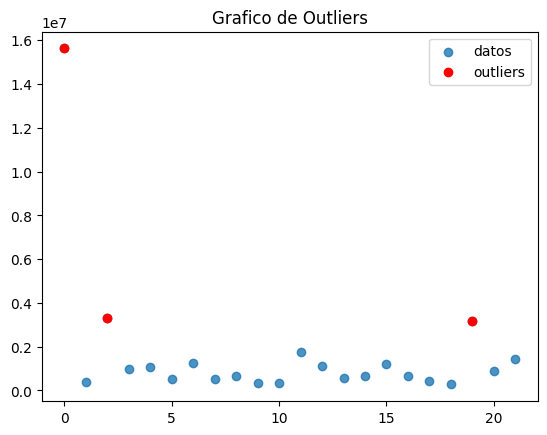

In [63]:
plt.scatter(df.index,df["pop"], label="datos", alpha=0.8)
plt.scatter(outliers.index,outliers["pop"], color="red", label="outliers")
plt.title("Grafico de Outliers")
plt.legend()
plt.show()

Aquí nos encontramos con 3 outliers claros que no solo se ven en el diagrama de caja, sino también en el gráfico lineal. En este caso, un outliers se encuentran por encima y con gran diferencia (Provincia de Buenos Aires). Este gráfico permite ver con mayor precisión la distancia que existe entre los outliers y los resultados que están muy por debajo sin llegar a ser outliers, como lo son Río Negro o Catamarca.

# Variable 9 :(movie_theatres_per_cap). Esta variable no se tiene en cuenta debido a considerarla irrelevante para el analisis.

# Variable 10: (doctors_per_cap) - Cantidad de Medicos per Capita

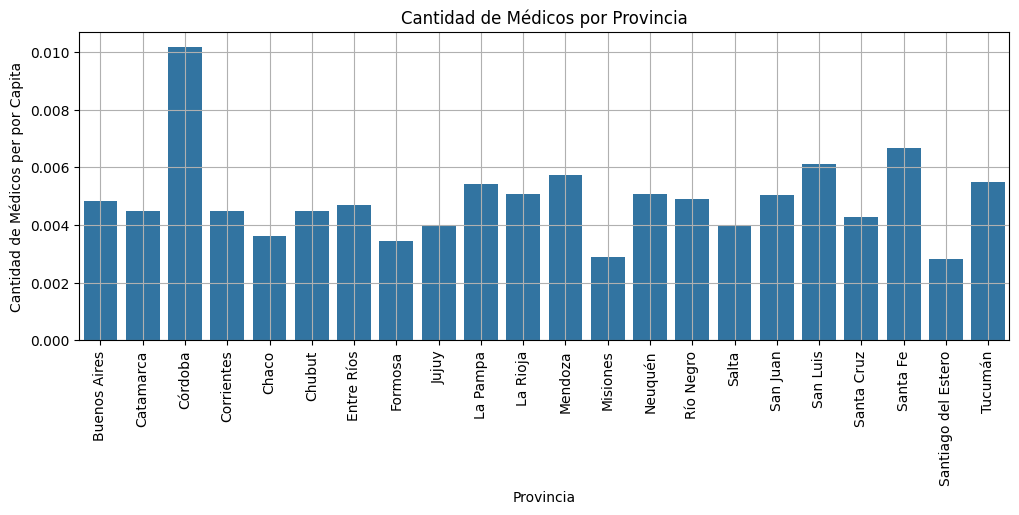

In [64]:
fig = plt.figure(figsize = (12,4))
sns.barplot(data=df,x="province", y="doctors_per_cap")
plt.xticks(rotation=90) 
plt.grid()
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Médicos per por Capita")
plt.title("Cantidad de Médicos por Provincia")
plt.show()

+ Aqui nos volvemos a encontrar con una variable que tiene datos del tipo entero, por lo que consideramos untilizar solamente un grafico de barras para poder apreciar sus diferencias

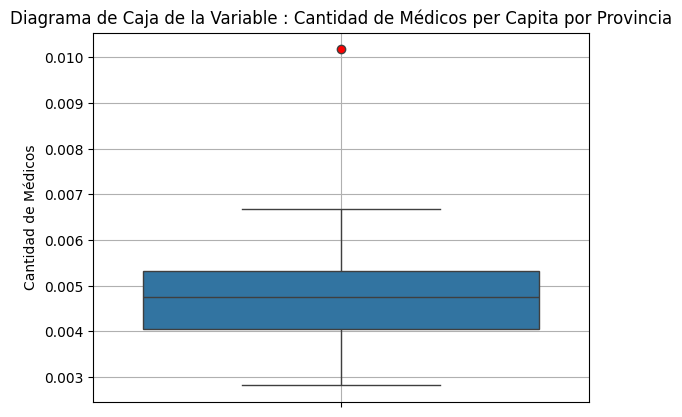

In [65]:
sns.boxplot(data=df, y="doctors_per_cap",flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.title("Diagrama de Caja de la Variable : Cantidad de Médicos per Capita por Provincia")
plt.ylabel("Cantidad de Médicos")
plt.grid()
plt.show()

In [66]:
print("La media del conjunto (Médicos per capita) es",df ["doctors_per_cap"].mean())
print("La mediana del conjunto (Médicos per capita) es",df ["doctors_per_cap"].median())

La media del conjunto (Médicos per capita) es 0.0048937198338432
La mediana del conjunto (Médicos per capita) es 0.0047572236527185004


In [67]:
Q1= df["doctors_per_cap"].quantile(0.25)
Q3= df["doctors_per_cap"].quantile(0.75)
iqr= Q3-Q1
umbral_superior = Q3 + 1.50*iqr
umbral_inferior = max(0,Q1 - 1.5 * iqr)
print("Un valor de Médicos per capita por debajo de:",umbral_inferior,"es un outlier")
print("Un valor de Médicos per capita por arriba de:",umbral_superior,"es un outlier")

Un valor de Médicos per capita por debajo de: 0.0021514679307945636 es un outlier
Un valor de Médicos per capita por arriba de: 0.007243582839701661 es un outlier


In [68]:
outliers= df[(df["doctors_per_cap"] < umbral_inferior) | (df["doctors_per_cap"] > umbral_superior)]
print ("cantidad de Outliers",len(outliers))

cantidad de Outliers 1


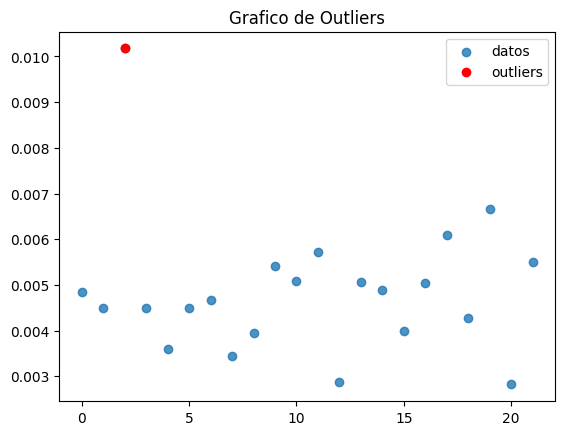

In [69]:
plt.scatter(df.index,df["doctors_per_cap"], label="datos", alpha=0.8)
plt.scatter(outliers.index,outliers["doctors_per_cap"], color="red", label="outliers")
plt.title("Grafico de Outliers")
plt.legend()
plt.show()

+ En esta caso, existe un solo outlier que reslta por encima del resto, sobre pasa con creces a todas las demas provincias demostrando ser una provincia con gran numero de medicos

# Matriz de Correlaciones

# Explicar resultados de la Matriz y tenerla en cuanta para formular hipotesis
Matriz de Correlación:

La matriz de correlación es una herramienta descriptiva que se utiliza para evaluar la relación lineal entre las variables en un conjunto de datos. Proporciona una visión general de cómo las variables se relacionan entre sí en términos de la fuerza y la dirección de la asociación.
La matriz de correlación no establece relaciones de causa y efecto. Solo describe cómo las variables se mueven juntas. Muestra la correlación, que puede ser positiva (ambas variables aumentan juntas), negativa (una variable aumenta mientras que la otra disminuye) o nula (no hay correlación).
Es una herramienta exploratoria que te permite identificar relaciones potenciales entre variables y guiar la selección de variables para análisis posteriores

In [70]:
df.corr (numeric_only=True)

,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
gdp,1.000000,-0.291704,-0.248149,-0.269605,-0.182342,-0.143599,-0.112779,0.990457,-0.006717,0.231281
illiteracy,-0.291704,1.000000,0.639461,0.576317,0.619712,0.791507,0.338452,-0.206791,-0.634247,-0.422702
poverty,-0.248149,0.639461,1.000000,0.501767,0.378745,0.693974,0.472627,-0.160277,-0.647118,-0.643937
deficient_infra,-0.269605,0.576317,0.501767,1.000000,0.185644,0.626746,0.381544,-0.233857,-0.265632,-0.348995
school_dropout,-0.182342,0.619712,0.378745,0.185644,1.000000,0.424930,0.417245,-0.155070,-0.435447,-0.175279
no_healthcare,-0.143599,0.791507,0.693974,0.626746,0.424930,1.000000,0.353931,-0.052823,-0.677575,-0.426163
birth_mortal,-0.112779,0.338452,0.472627,0.381544,0.417245,0.353931,1.000000,-0.076125,-0.043900,-0.193167
pop,0.990457,-0.206791,-0.160277,-0.233857,-0.155070,-0.052823,-0.076125,1.000000,-0.081282,0.159901
movie_theatres_per_cap,-0.006717,-0.634247,-0.647118,-0.265632,-0.435447,-0.677575,-0.043900,-0.081282,1.000000,0.399421
doctors_per_cap,0.231281,-0.422702,-0.643937,-0.348995,-0.175279,-0.426163,-0.193167,0.159901,0.399421,1.000000


<Axes: >

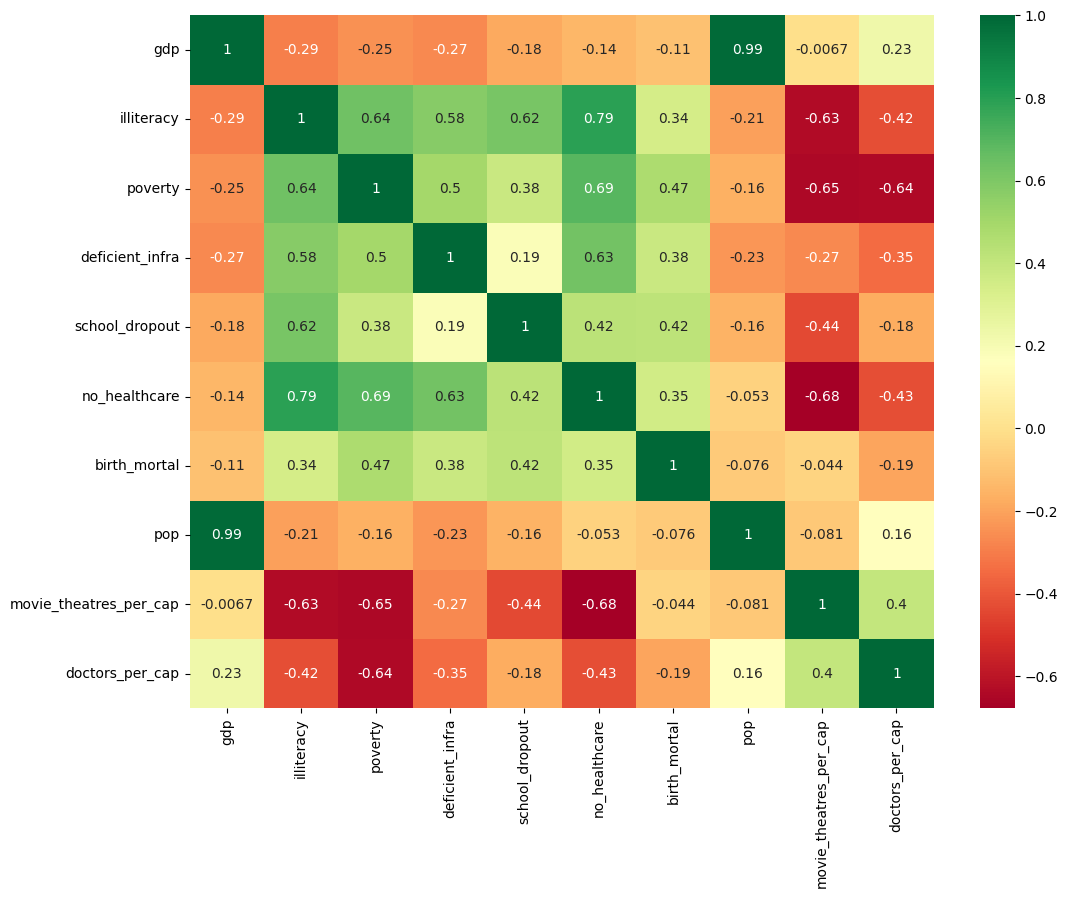

In [71]:
fig = plt.figure(figsize = (12,9))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="RdYlGn")

+ debido a que no existen datos de tipo "Object" no fue necesario establecer ningun tipo de remplazo en la matriz de correlacion

Encontramos que existe una correlacion positiva entre las variables : analfabelsitmo y abandono escolar (0,62), y entre analfabetismo y pobreza (0,64)

# Hipotesis 

### Observando los datos, planteamos la siguiente hipotesis : que a mayores niveles de analfabetismo, esperamos encontrar mayores niveles de pobreza y de abandono escolar.

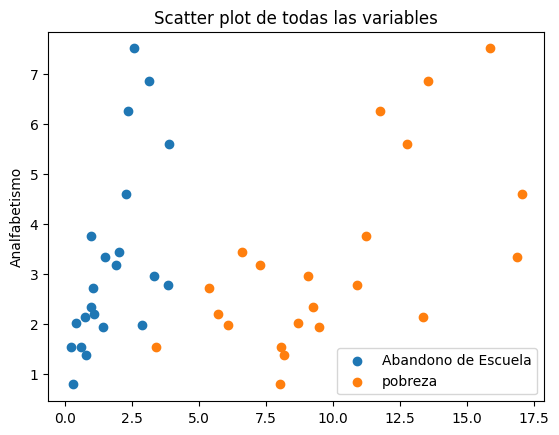

In [72]:
#graficacion de las variables a utilizar
  
y = df["illiteracy"]
x_1 = df["school_dropout"]
x_2 = df["poverty"]
 
plt.scatter(x_1, y, label="Abandono de Escuela")
plt.scatter(x_2, y, label="pobreza")
plt.ylabel("Analfabetismo")
 

plt.title("Scatter plot de todas las variables")
plt.legend()
plt.show()



Una vez graficado esto, podemos observar con mayor atención cómo se superponen los datos y la cercanía que tienen unos con otros, así como también cómo están centrados en la parte inferior del mismo

# Regresion

+ Para desarollar nuestra regresion tomaremos como variable independiente el analfabetismo y como dependientes la pobraza y la tasa de abaondono escolar

In [73]:
X = df[["poverty", "school_dropout"]]  # Variables independientes
Y = df["illiteracy"]  # Variable dependiente

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print("coeficientes", model.coef_)
print("ordenada al origen", model.intercept_)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("el MSE es: ", mse)
print("el R cuadrado es: ", r2)


coeficientes [0.19933212 0.68901995]
ordenada al origen 0.007034953438737279
el MSE es:  1.5625862991358204
el R cuadrado es:  0.5852553746550864


La conclusión a la que se llega después de analizar los resultados de la regresión es que el MSE se podría considerar bajo, lo que indica que el modelo tiene un buen ajuste y las predicciones tienden a estar cercanas a los valores reales. El R cuadrado da un valor de 0.59, sugiriendo que el modelo es un 59% confiable y explica razonablemente bien la variabilidad de los casos. Sin embargo, podría existir espacio para mejorar utilizando otras variables que no se encuentran en este análisis, ya que el modelo no captura el 41% de la variabilidad.




# Grafico de La Regresion

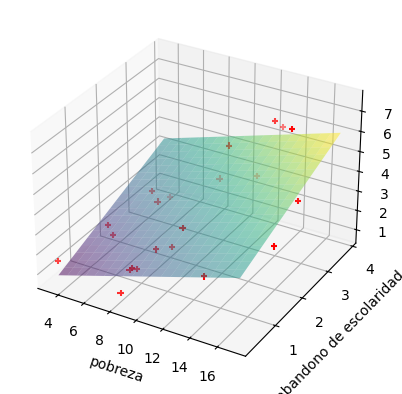

In [74]:
a = model.coef_[0]
b = model.coef_[1]
c = model.intercept_

x1_range = np.linspace(X['poverty'].min(), X['poverty'].max(), 20)
x2_range = np.linspace(X['school_dropout'].min(), X['school_dropout'].max(), 20)

x1_plane, x2_plane = np.meshgrid(x1_range, x2_range)
y_plane = a * x1_plane + b * x2_plane + c

#crea figura 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos originales
ax.scatter(X['poverty'], X['school_dropout'], Y, c='r', marker='+', label='Datos')

# Graficar el plano de regresión
ax.plot_surface(x1_plane, x2_plane, y_plane, alpha=0.5, cmap='viridis', label='Plano de Regresión')

# Etiquetas de los ejes
ax.set_xlabel('pobreza')
ax.set_ylabel('abandono de escolaridad')
ax.set_zlabel('analfabetismo')

# Mostrar el gráfico
plt.show()

El plano que se grafica representa el modelo de regresión lineal múltiple. Este plano es la representación tridimensional de la ecuación de regresión lineal en el espacio formado por las variables independientes (tasa de pobreza y tasa de abandono escolar) y la variable dependiente (nivel de analfabetismo).

El objetivo de esta representación es visualizar cómo el modelo de regresión lineal múltiple intenta explicar la relación entre las variables predictoras (tasa de pobreza y tasa de abandono escolar) y la variable de respuesta (nivel de analfabetismo) en un espacio tridimensional. Esto permite observar visualmente cómo el modelo está tratando de ajustarse a los datos originales en ese espacio tridimensiona



.

# Conclusion

Podemos afirmar la existencia de una relación entre las variables explicativas y la variable explicada. En términos generales, tomando en cuenta que el 59% del analfabetismo se explica por las dos variables analizadas (altas tasas de pobreza y altas tasas de abandono escolar), se podría argumentar que al sumar provincias con estas características, el analfabetismo tiende a incrementarse. Sin embargo, queda un 41% sin explicar, y es posible que existan casos donde la tasa de pobreza sea alta pero el analfabetismo sea bajo, o viceversa. Este 42% no explicado puede deberse a otras variables, como la infraestructura o el acceso a la salud de las personas.


